# Inference about a random variable given a noisy observation

In [1]:
import jax.numpy as jnp
from jax import random
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn
import seaborn as sns

try:
    import probml_utils as pml
except:
    %pip install git+https://github.com/probml/probml-utils.git
    import probml_utils as pml

from probml_utils import savefig, latexify

In [2]:
latexify(width_scale_factor=2, fig_height=2.5)

C:\Users\NITISH SHARMA\.pyenv\pyenv-win\versions\3.9.10\lib\site-packages\probml_utils\plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


In [3]:
def plot_data(quantiles, pdf_dict, variance_prior, save_name=""):
    """
    Plot data

    Args:
    ----------
    quantiles : JAX array
        Quantiles for normal distribution

    pdf_dict : dictionary
        Data and plotting options for
        all PDF's

    variance_prior : int/float
        Variance of Prior

    save_name : string, default=''
        Filename for the saved graph

    Returns:
    ----------
    None
    """

    # Setup graph and parameters
    fig = plt.figure()
    plt.ylim(0, 0.6)
    plt.xlim(-7, 7)
    plt.xticks([-7, 0, 7])

    # Plot graph
    for k, v in pdf_dict.items():
        plt.plot(
            quantiles,
            v["pdf"],
            color=v["color"],
            label=k,
            linestyle=v["linestyle"],
            linewidth=1.5,
        )

    # Update labels,legends and title
    plt.title(f"Prior with variance of {variance_prior}")
    plt.xlabel("$x$")
    plt.ylabel("$p(x)$")
    plt.legend(loc="upper left")
    sns.despine()

    # Save figure to files
    if len(save_name) > 0:
        savefig(save_name)

    plt.show()

In [4]:
def generate_PDF(prior_var=[1, 5], prior_mean=[0, 0], observed_var=[1, 1]):
    """
    Plot PDF for prior, likelihood and posterior of a gaussian
    distribution to gain insight about a random variable given
    a noisy observation under the effect of a strong prior
    versus a weak prior

    Args:
    ----------
    prior_var : list,default=[1, 5]
        List of Variance of priors

    prior_mean : list,default=[0, 0]
        List of Mean of Priors

    observed_var : list, default=[1,1]
        List of Variance of Noise

    Returns:
    ----------
    None
    """

    # The noisy observation
    obsrvd_val = 3

    # Quantiles for data
    quantiles = jnp.arange(-7, 7, 0.10)

    for mean_prior, variance_prior, variance_observed in zip(prior_mean, prior_var, observed_var):

        # Prior variance,mean and PDF
        prior_var = variance_prior
        prior_mu = mean_prior
        prior_pdf = mvn.pdf(quantiles, mean=prior_mu, cov=prior_var)

        # Likelihood variance,mean and PDF
        mle_var = variance_observed
        mle_mu = jnp.mean(obsrvd_val)
        mle_pdf = mvn.pdf(quantiles, mean=mle_mu, cov=mle_var)

        # Number of noisy observations
        obsrvd_val_count = jnp.size(obsrvd_val)

        # Posterior variance,mean and PDF
        pos_var = (mle_var * prior_var) / ((obsrvd_val_count * prior_var) + mle_var)
        pos_mu = pos_var * ((prior_mu / prior_var) + ((obsrvd_val_count * mle_mu) / mle_var))
        pos_pdf = mvn.pdf(quantiles, mean=pos_mu, cov=pos_var)

        # Setup data and graphing options
        pdf_plot_dict = {
            "prior": {"pdf": prior_pdf, "color": "blue", "linestyle": "-"},
            "likelihood": {"pdf": mle_pdf, "color": "red", "linestyle": ":"},
            "posterior": {"pdf": pos_pdf, "color": "black", "linestyle": "-."},
        }

        # Plot
        plot_data(
            quantiles,
            pdf_plot_dict,
            variance_prior,
            f"gauss_infer_1d_prior{variance_prior}_latexified",
        )

C:\Users\NITISH SHARMA\.pyenv\pyenv-win\versions\3.9.10\lib\site-packages\probml_utils\plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


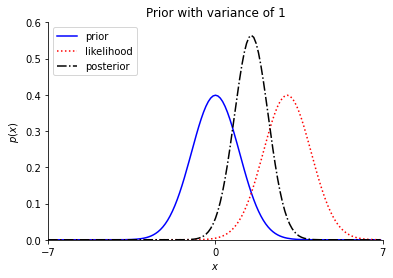

C:\Users\NITISH SHARMA\.pyenv\pyenv-win\versions\3.9.10\lib\site-packages\probml_utils\plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


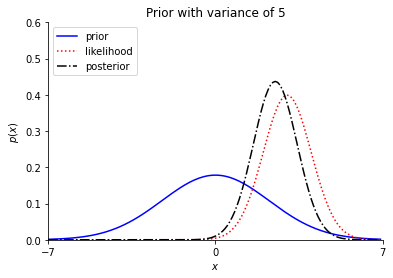

In [5]:
generate_PDF()

In [6]:
from ipywidgets import Layout, interact
import ipywidgets as widgets


@interact(
    prior_var=widgets.FloatSlider(
        description="prior variance",
        min=0.0,
        max=5.0,
        value=1.0,
        step=0.1,
        style=dict(description_width="initial"),
        continuous_update=False,
    ),
    prior_mean=widgets.FloatSlider(
        description="prior mean",
        min=0.0,
        max=5.0,
        value=0.0,
        step=0.1,
        style=dict(description_width="initial"),
        continuous_update=False,
    ),
    observed_var=widgets.FloatSlider(
        description="Variance of Observed values",
        min=0.0,
        max=5.0,
        value=1.0,
        step=0.1,
        style=dict(description_width="initial"),
        layout=Layout(width="40%"),
        continuous_update=False,
    ),
)
def update(prior_var, prior_mean, observed_var):
    generate_PDF(prior_var=[prior_var], prior_mean=[prior_mean], observed_var=[observed_var])

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='prior variance', max=5.0, s…